<a href="https://colab.research.google.com/github/Gabendi/DL_HW/blob/master/VITMAV45_QBF10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# bit.ly/vitmav45-2019

In [0]:
import numpy as np
from sklearn import preprocessing
import copy
import matplotlib.pyplot as plt


In [0]:
def activation(x): # sigmoid
  return 1/(1+np.exp(-x))

def dactivation(x): # sigmoid derivalt
  return np.exp(-x)/((1+np.exp(-x))**2)

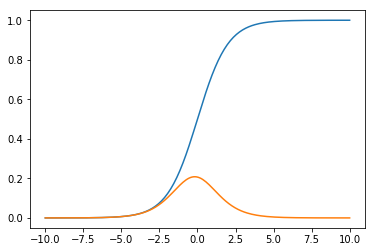

In [0]:
segedX = np.linspace(-10,10,200)
plt.plot(segedX,activation(segedX))
plt.plot(segedX,dactivation(segedX))

In [0]:
## nnetwork = MLP(2,3,1)
class MLP:
    def __init__(self, *args):
        np.random.seed(123)
        self.shape = args
        n = len(args)
        self.layers = []
        # bemeneti reteg, +1 a bias
        self.layers.append(np.ones(self.shape[0]+1))
        # tobbi reteg, bias nelkul
        for i in range(1,n):
            self.layers.append(np.ones(self.shape[i]))
        self.weights = []
        for i in range(n-1):
            self.weights.append(np.zeros((self.layers[i].size,
                                          self.layers[i+1].size)))
        #self.dw = ....
        self.reset()
    
    def reset(self):
        for i in range(len(self.weights)):
            Z = np.random.random((self.layers[i].size,
                                  self.layers[i+1].size))
            self.weights[i][...] = (2*Z-1) # -1..1-be atskalazzuk

    def propagate_forward(self, data):
        self.layers[0][0:-1] = data
        for i in range(1, len(self.shape)):
            self.layers[i][...] = activation(np.dot(self.layers[i-1],
                                                    self.weights[i-1]))
        return self.layers[-1]

    # backprop
    def propagate_backward(self, target, lrate=0.1):
        deltas = []
        error = -(target-self.layers[-1]) # cost/loss/error funtion alapjan
        delta = np.multiply(error,
                            dactivation(np.dot(self.layers[-2],
                                               self.weights[-1]))) #f'(s(3))
        deltas.append(delta)
        
        # Gradiens kiszámítása a rejtett réteg(ek)ben
        for i in range(len(self.shape)-2,0,-1):
            delta = np.dot(deltas[0], self.weights[i].T)* \
                           dactivation(np.dot(self.layers[i-1],self.weights[i-1]))
            deltas.insert(0,delta)

        # Súlyok módosítása
        for i in range(len(self.weights)):
          layer = np.atleast_2d(self.layers[i])
          delta = np.atleast_2d(deltas[i])

          dw = -0.22*lrate*np.dot(layer.T, delta) #.....
          self.weights[i] += dw

        # Visszatérés a hibával
        return (error**2).sum()
		
def learn(network, X, Y, valid_split, test_split, epochs=5000, lrate=0.01):

        # train-validation-test minták különválasztása
        X_train = X[0:int(X.shape[0]*(1-valid_split-test_split))]
        Y_train = Y[0:int(X.shape[0]*(1-valid_split-test_split))]
        X_valid = X[int(X.shape[0]*(1-valid_split-test_split)):int(X.shape[0]*(1-test_split))]
        Y_valid = Y[int(X.shape[0]*(1-valid_split-test_split)):int(X.shape[0]*(1-test_split))]
        X_test  = X[int(X.shape[0]*(1-test_split)):]
        Y_test  = Y[int(X.shape[0]*(1-test_split)):]
    
        # standardizálás
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_valid = scaler.transform(X_valid)
        X_test  = scaler.transform(X_test)

        # adatok osszekeverese
        randperm = np.random.permutation(len(X_train))
        X_train, Y_train = X_train[randperm], Y_train[randperm]
		
        # Tanítási fázis, epoch-szor megyünk át 1-1 véltelenszerűen kiválasztott mintán.
        for i in range(epochs):
          train_err = 0
          for k in range(X_train.shape[0]):
            network.propagate_forward( X_train [k] )
            train_err += network.propagate_backward( Y_train[k], lrate )
          train_err /= X_train.shape[0]

          # validacio
          valid_err = 0
          o_valid = np.zeros(X_valid.shape[0])
          for k in range(X_valid.shape[0]):
            o_valid[k] = network.propagate_forward( X_valid[k] )
            valid_err += (o_valid[k] - Y_valid[k])**2
          valid_err /= Y_valid.shape[0]

          print("%d epoch, train_err: %.4f, valid_err: %.4f" % (i,train_err,valid_err))
				
        # Tesztelési fázis
        test_err = 0
        o_test = np.zeros(X_test.shape[0])
        for k in range(X_test.shape[0]):
          o_test[k] = network.propagate_forward( X_test[k] )
          print("Predikcio:",o_test[k],"valos:",Y_test[k])
          test_err += (o_test[k] - Y_test[k])**2
        test_err /= Y_test.shape[0]  

        print("TESZT HIBA:",test_err)     
        #fig1=plt.figure()
        #plt.scatter(...

In [0]:
network = MLP(2,10,1)

In [0]:
#samples = np.zeros(4, dtype[('input',float,2), ('output',float,1)])
nb_samples = 200
X = np.zeros((nb_samples,2))
Y = np.zeros(nb_samples)
for i in range(0,nb_samples,4):
  noise = np.random.normal(0,1,8)
  X[i],   Y[i]   = (-2+noise[0], -2+noise[1]), 0
  X[i+1], Y[i+1] = ( 2+noise[2], -2+noise[3]), 1
  X[i+2], Y[i+2] = (-2+noise[4],  2+noise[5]), 1
  X[i+3], Y[i+3] = ( 2+noise[6],  2+noise[7]), 0
  

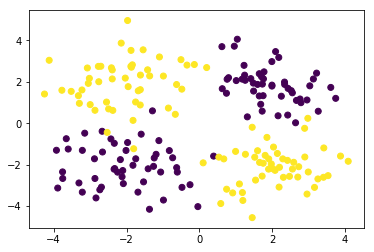

In [0]:
plt.scatter(X[:,0],X[:,1],c=Y[:])

In [0]:
network.reset()
learn(network,X,Y,0.2,0.1,lrate=0.3,epochs=100)

0 epoch, train_err: 0.2500, valid_err: 0.2467
1 epoch, train_err: 0.2487, valid_err: 0.2456
2 epoch, train_err: 0.2474, valid_err: 0.2445
3 epoch, train_err: 0.2463, valid_err: 0.2435
4 epoch, train_err: 0.2452, valid_err: 0.2425
5 epoch, train_err: 0.2441, valid_err: 0.2416
6 epoch, train_err: 0.2431, valid_err: 0.2406
7 epoch, train_err: 0.2421, valid_err: 0.2396
8 epoch, train_err: 0.2410, valid_err: 0.2386
9 epoch, train_err: 0.2399, valid_err: 0.2376
10 epoch, train_err: 0.2388, valid_err: 0.2365
11 epoch, train_err: 0.2376, valid_err: 0.2353
12 epoch, train_err: 0.2364, valid_err: 0.2341
13 epoch, train_err: 0.2351, valid_err: 0.2328
14 epoch, train_err: 0.2338, valid_err: 0.2314
15 epoch, train_err: 0.2323, valid_err: 0.2300
16 epoch, train_err: 0.2309, valid_err: 0.2285
17 epoch, train_err: 0.2293, valid_err: 0.2269
18 epoch, train_err: 0.2276, valid_err: 0.2252
19 epoch, train_err: 0.2259, valid_err: 0.2234
20 epoch, train_err: 0.2241, valid_err: 0.2215
21 epoch, train_err: 0.

NameError: ignored